# Mean Reversion

In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
from scipy.optimize import minimize
import matplotlib.pyplot as plt

from typing import Tuple, Union
from datetime import datetime

In [2]:
sym_list = ["BCHUSD", "ETHUSD", "USDTUSD"]
data_dict = {}

# loop through list and assign data
for sym in sym_list:
    # Generate the key dynamically
    key = f"{sym}_2023"
    data =  pd.read_csv(f"{key}.csv")
    data.columns = data.columns.str.upper()
    data["DATE"] = pd.to_datetime(data["DATE"])
    data = data.set_index("DATE")
    data_dict[sym] = data   

In [3]:
data_dict.keys()

dict_keys(['BCHUSD', 'ETHUSD', 'USDTUSD'])

In [4]:
# format all dfs into one

start_date = pd.Timestamp("2023-07-01 00:00:00+00:00")
end_date = pd.Timestamp("2023-12-31 00:00:00+00:00")
full_date_range = pd.date_range(start=start_date, end=end_date, freq="5min")


def fill_entire_time_period_daily(df: pd.DataFrame) -> pd.DataFrame:
    """Function to ensure time period has 5 minutely data."""
    df = df.reindex(full_date_range)
    
    #forward fill most missing values 
    df = df.ffill()

    # backfill any data missing at the start
    df = df.bfill()

    return df

bchusd = fill_entire_time_period_daily(df=data_dict["BCHUSD"])
ethusd = fill_entire_time_period_daily(df=data_dict["ETHUSD"])
# some duplicate indices found in USDTUSD dataset
data_dict["USDTUSD"] = data_dict["USDTUSD"][~data_dict["USDTUSD"].index.duplicated(keep='first')]
usdtusd = fill_entire_time_period_daily(df=data_dict["USDTUSD"])


# combine to single df
all_prices_df = pd.DataFrame()
all_prices_df["BCHUSD"] = bchusd["CLOSE"]
all_prices_df["ETHUSD"] = ethusd["CLOSE"]
all_prices_df["USDTUSD"] = usdtusd["CLOSE"]
all_prices_df

,BCHUSD,ETHUSD,USDTUSD
2023-07-01 00:00:00+00:00,307.492000,1935.306488,0.999700
2023-07-01 00:05:00+00:00,307.065500,1936.735405,1.000006
2023-07-01 00:10:00+00:00,301.070000,1932.105500,0.999668
2023-07-01 00:15:00+00:00,303.241024,1933.941828,0.999678
2023-07-01 00:20:00+00:00,309.665000,1935.518951,0.999877
...,...,...,...
2023-12-30 23:40:00+00:00,271.894000,2293.045000,1.000069
2023-12-30 23:45:00+00:00,271.517000,2293.600000,1.000133
2023-12-30 23:50:00+00:00,271.231000,2292.835000,1.000302
2023-12-30 23:55:00+00:00,270.485000,2291.201500,1.000275


## BCHUSD

In [5]:
prices = all_prices_df["BCHUSD"]
log_prices = np.log(prices)

# Check for stationarity using ADF test
adf_result = adfuller(log_prices)
print("Prices")
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
print("Num lags used:", adf_result[2])
print("Num obsvs used:", adf_result[3])
print("ADF Test Critical Values:", adf_result[4])
print("\n")

# check on returns on log prices 
returns = log_prices.diff().dropna()
print("Returns")

# Check for stationarity using ADF test
adf_result = adfuller(returns)
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
print("Num lags used:", adf_result[2])
print("Num obsvs used:", adf_result[3])
print("ADF Test Critical Values:", adf_result[4])

Prices
ADF Statistic: -3.0731051824563034
p-value: 0.02860861426898512
Num lags used: 8
Num obsvs used: 52696
ADF Test Critical Values: {'1%': -3.4304741008534365, '5%': -2.861594850090369, '10%': -2.5667991948782785}


Returns
ADF Statistic: -84.27145280496882
p-value: 0.0
Num lags used: 7
Num obsvs used: 52696
ADF Test Critical Values: {'1%': -3.4304741008534365, '5%': -2.861594850090369, '10%': -2.5667991948782785}


## ETHUSD

In [6]:
prices = all_prices_df["ETHUSD"]
log_prices = np.log(prices)

# Check for stationarity using ADF test
adf_result = adfuller(log_prices)
print("Prices")
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
print("Num lags used:", adf_result[2])
print("Num obsvs used:", adf_result[3])
print("ADF Test Critical Values:", adf_result[4])
print("\n")

# check on returns on log prices 
returns = log_prices.diff().dropna()
print("Returns")

# Check for stationarity using ADF test
adf_result = adfuller(returns)
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
print("Num lags used:", adf_result[2])
print("Num obsvs used:", adf_result[3])
print("ADF Test Critical Values:", adf_result[4])

Prices
ADF Statistic: -0.4586332207426867
p-value: 0.8998393095847448
Num lags used: 24
Num obsvs used: 52680
ADF Test Critical Values: {'1%': -3.430474138547256, '5%': -2.8615948667499334, '10%': -2.566799203745671}


Returns
ADF Statistic: -48.18834493693351
p-value: 0.0
Num lags used: 23
Num obsvs used: 52680
ADF Test Critical Values: {'1%': -3.430474138547256, '5%': -2.8615948667499334, '10%': -2.566799203745671}


## USDTUSD

In [7]:
prices = all_prices_df["USDTUSD"]
log_prices = np.log(prices)

# Check for stationarity using ADF test
adf_result = adfuller(log_prices)
print("Prices")
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
print("Num lags used:", adf_result[2])
print("Num obsvs used:", adf_result[3])
print("ADF Test Critical Values:", adf_result[4])
print("\n")

# check on returns on log prices 
returns = log_prices.diff().dropna()
print("Returns")

# Check for stationarity using ADF test
adf_result = adfuller(returns)
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
print("Num lags used:", adf_result[2])
print("Num obsvs used:", adf_result[3])
print("ADF Test Critical Values:", adf_result[4])

Prices
ADF Statistic: -6.93225313933133
p-value: 1.0766239922195141e-09
Num lags used: 34
Num obsvs used: 52670
ADF Test Critical Values: {'1%': -3.4304741621175237, '5%': -2.861594877167301, '10%': -2.566799209290527}


Returns
ADF Statistic: -39.71881662976936
p-value: 0.0
Num lags used: 52
Num obsvs used: 52651
ADF Test Critical Values: {'1%': -3.4304742069256995, '5%': -2.8615948969712024, '10%': -2.566799219831557}


* For USDTUSD prices, the p-value for the Augmented Dickey Fuller statistic (ADF) is low the ADF p-value is extremely low (1.08 * 10^-9), meaning we can reject the null hypothesis of non-stationarity at all critical level values (1%, 5% and 10%)
* Log prices often show trends and are typically non-stationary, as can be seen in the test results for ETHUSD log prices. However this is an expected result as USDTUSD (Tether) is a stablecoin that is pegged to the US dollar.


* For USDTUSD Returns, the extremely low ADF statistics and p-value confirm the returns are stationary. 

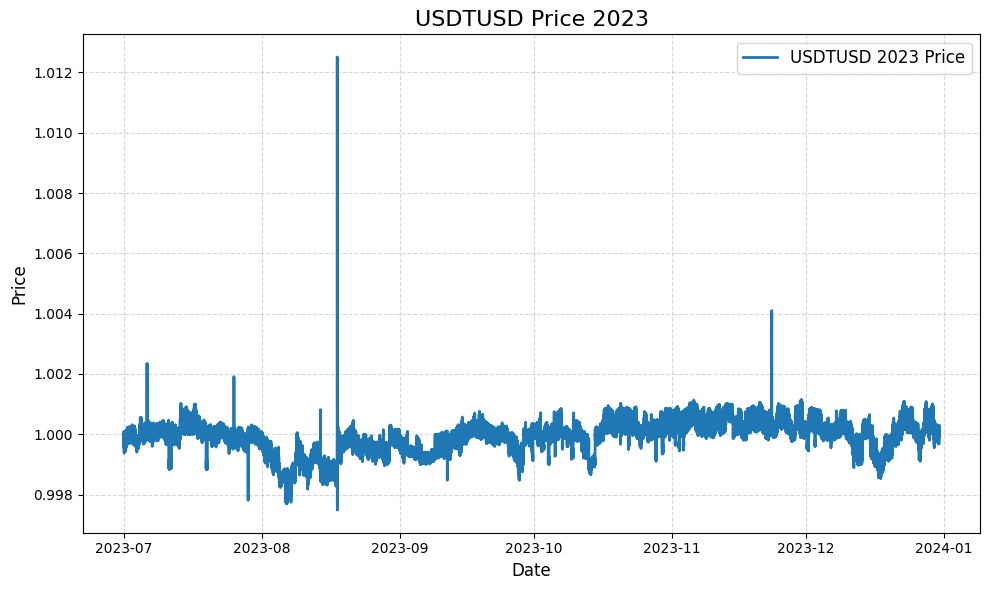

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(all_prices_df.index, all_prices_df["USDTUSD"], label="USDTUSD 2023 Price", linewidth=2)
plt.title("USDTUSD Price 2023", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()